1.Naive Bayes algorithm:
(i).Multinomial NB classifier algorithm

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Email-spam-detection/master/emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
 df.shape

(5728, 2)

In [ ]:
 df.columns

Index(['text', 'spam'], dtype='object')

In [ ]:

df.drop_duplicates(inplace=True)
print(df.shape)

(5695, 2)


In [ ]:
 print(df.isnull().sum())

text    0
spam    0
dtype: int64


In [ ]:

# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['text'].head().apply(process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(df['text'])

In [ ]:

#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, df['spam'], test_size=0.20, random_state=0)
# To see the shape of the data
print(message.shape)

(5695, 37229)


In [ ]:

# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [ ]:

print(classifier.predict(xtrain))
print(ytrain.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:

# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3445   12]
 [   1 1098]]
Accuracy: 
 0.9971466198419666


In [ ]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [ ]:

# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


Confusion Matrix: 
 [[862   8]
 [  1 268]]
Accuracy: 
 0.9920983318700615


In [ ]:
 MN_score = classifier.score(xtest,ytest)
MN_score

0.9920983318700615

 (II) Gaussian NB algorithm

In [ ]:
 import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
df1 = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Email-spam-detection/master/emails.csv")
corpus = []
for i in range(0, len(df1)):
  e_mail = re.sub('[^a-zA-Z]', ' ', df1['text'][i])
  e_mail = e_mail.split()
  ps = PorterStemmer()
  e_mail = [ps.stem(word) for word in e_mail if not word in set(stopwords.words('english'))]
  e_mail = ' '.join(e_mail)
  corpus.append(e_mail)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df1['spam']

In [ ]:
 X.shape

(5728, 25607)

In [ ]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
 from sklearn.naive_bayes import GaussianNB
GN_classifier = GaussianNB()
GN_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
 GN_score = GN_classifier.score(X_test,y_test)
GN_score

0.9607329842931938

In [ ]:
 y_GN_pred = GN_classifier.predict(X_test)
y_GN_pred

array([0, 0, 1, ..., 0, 0, 1])

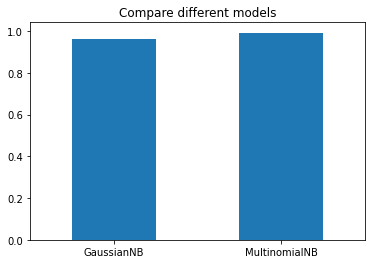

In [ ]:
 models = pd.DataFrame({"GaussianNB": GN_score,
                           "MultinomialNB": MN_score
                           },
                          index=[0])

models.T.plot.bar(title="Compare different models",
                      legend=False)
plt.xticks(rotation=0);

2. Random Forest classifier algorithm

1.   List item
2.   List item



In [ ]:
 import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
 df2 = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Email-spam-detection/master/emails.csv")

In [ ]:
 X, y = make_classification(n_samples=2736, n_features=2, n_informative=2, n_redundant=0, random_state=5)

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
 RDclassifier = RandomForestClassifier(n_estimators=20, random_state=5)
RDclassifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
 RDclassifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
 print(RDclassifier.predict(X_train))
y_prediction = RDclassifier.predict(X_test)

[0 0 0 ... 0 0 1]


In [ ]:
 # Accuracy
print(metrics.accuracy_score(y_test, y_prediction))

0.9945255474452555


In [ ]:
 RDclassifier.apply(X)

array([[ 32,  77,  42, ...,  20,  22,  28],
       [125, 152, 136, ..., 196, 178,  88],
       [251, 256, 256, ..., 251, 239, 231],
       ...,
       [ 30,  28,  29, ...,  20,  12,  45],
       [233, 243, 246, ..., 239, 231, 211],
       [ 32,  77,  42, ...,  20,  22,  28]])

In [ ]:
 RDclassifier.decision_path(X)

(<2736x5196 sparse matrix of type '<class 'numpy.longlong'>'
 	with 482453 stored elements in Compressed Sparse Row format>,
 array([   0,  271,  544,  819, 1118, 1375, 1638, 1891, 2152, 2437, 2698,
        2967, 3204, 3447, 3678, 3947, 4168, 4427, 4706, 4953, 5196]))

In [ ]:
 RDclassifier.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 5,
 'verbose': 0,
 'warm_start': False}

In [ ]:
 RDclassifier.score(X, y)

0.9974415204678363